<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data_add_delta_(2_4)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_2.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_2.4_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,53.031173,96.710196,24.370348,136.142786,320.254503,168.107883,152.146619
1,0.0,1.0,79.735103,69.939304,59.302123,116.335192,335.311723,211.001273,124.310450
2,0.0,2.0,39.896229,24.890286,40.286500,-19.250094,95.822921,128.004529,-32.181608
3,0.0,3.0,47.586037,78.338204,94.943687,30.277694,261.145622,211.292985,49.852637
4,0.0,4.0,63.514174,32.073093,46.765570,-7.611134,144.741704,162.465831,-17.724128
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,36.719930,67.191946,95.467874,204.731896,414.111646,210.116014,203.995632
19996,999.0,16.0,67.309555,31.630529,66.484472,53.600747,229.025303,124.554612,104.470691
19997,999.0,17.0,22.854086,88.623018,41.392169,220.641398,383.510671,278.870337,104.640335
19998,999.0,18.0,66.364710,71.830817,51.750786,-501.028668,-301.082356,174.911420,-475.993776


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3           e           Y  \
rep   index                                                            
0.0   0.0    53.031173  96.710196  24.370348  136.142786  320.254503   
      1.0    79.735103  69.939304  59.302123  116.335192  335.311723   
      2.0    39.896229  24.890286  40.286500  -19.250094   95.822921   
      3.0    47.586037  78.338204  94.943687   30.277694  261.145622   
      4.0    63.514174  32.073093  46.765570   -7.611134  144.741704   
...                ...        ...        ...         ...         ...   
999.0 15.0   36.719930  67.191946  95.467874  204.731896  414.111646   
      16.0   67.309555  31.630529  66.484472   53.600747  229.025303   
      17.0   22.854086  88.623018  41.392169  220.641398  383.510671   
      18.0   66.364710  71.830817  51.750786 -501.028668 -301.082356   
      19.0   80.959038  79.053472  57.235788 -179.239744   48.008554   

                  y_hat       e_hat  
rep   index                          
0.0   0.0    168.107883  152.146619  
      1.0    211.001273  124.310450  
      2.0    128.004529  -32.181608  
      3.0    211.292985   49.852637  
      4.0    162.465831  -17.724128  
...                 ...         ...  
999.0 15.0   210.116014  203.995632  
      16.0   124.554612  104.470691  
      17.0   278.870337  104.640335  
      18.0   174.911420 -475.993776  
      19.0   153.148215 -105.139661  

[20000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3           e           Y  \
rep   index                                                            
0.0   0.0    53.031173  96.710196  24.370348  136.142786  320.254503   
      1.0    79.735103  69.939304  59.302123  116.335192  335.311723   
      2.0    39.896229  24.890286  40.286500  -19.250094   95.822921   
      3.0    47.586037  78.338204  94.943687   30.277694  261.145622   
      4.0    63.514174  32.073093  46.765570   -7.611134  144.741704   
...                ...        ...        ...         ...         ...   
999.0 15.0   36.719930  67.191946  95.467874  204.731896  414.111646   
      16.0   67.309555  31.630529  66.484472   53.600747  229.025303   
      17.0   22.854086  88.623018  41.392169  220.641398  383.510671   
      18.0   66.364710  71.830817  51.750786 -501.028668 -301.082356   
      19.0   80.959038  79.053472  57.235788 -179.239744   48.008554   

                  y_hat       e_hat  
rep   index                          
0.0   0.0    168.107883  152.146619  
      1.0    211.001273  124.310450  
      2.0    128.004529  -32.181608  
      3.0    211.292985   49.852637  
      4.0    162.465831  -17.724128  
...                 ...         ...  
999.0 15.0   210.116014  203.995632  
      16.0   124.554612  104.470691  
      17.0   278.870337  104.640335  
      18.0   174.911420 -475.993776  
      19.0   153.148215 -105.139661  

[20000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,53.031173,96.710196,24.370348,136.142786,320.254503,168.107883,152.146619
1,0.0,1.0,79.735103,69.939304,59.302123,116.335192,335.311723,211.001273,124.310450
2,0.0,2.0,39.896229,24.890286,40.286500,-19.250094,95.822921,128.004529,-32.181608
3,0.0,3.0,47.586037,78.338204,94.943687,30.277694,261.145622,211.292985,49.852637
4,0.0,4.0,63.514174,32.073093,46.765570,-7.611134,144.741704,162.465831,-17.724128
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,36.719930,67.191946,95.467874,204.731896,414.111646,210.116014,203.995632
19996,999.0,16.0,67.309555,31.630529,66.484472,53.600747,229.025303,124.554612,104.470691
19997,999.0,17.0,22.854086,88.623018,41.392169,220.641398,383.510671,278.870337,104.640335
19998,999.0,18.0,66.364710,71.830817,51.750786,-501.028668,-301.082356,174.911420,-475.993776


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3           e           Y  \
rep   index                                                            
0.0   0.0    53.031173  96.710196  24.370348  136.142786  320.254503   
      1.0    79.735103  69.939304  59.302123  116.335192  335.311723   
      2.0    39.896229  24.890286  40.286500  -19.250094   95.822921   
      3.0    47.586037  78.338204  94.943687   30.277694  261.145622   
      4.0    63.514174  32.073093  46.765570   -7.611134  144.741704   
...                ...        ...        ...         ...         ...   
999.0 15.0   36.719930  67.191946  95.467874  204.731896  414.111646   
      16.0   67.309555  31.630529  66.484472   53.600747  229.025303   
      17.0   22.854086  88.623018  41.392169  220.641398  383.510671   
      18.0   66.364710  71.830817  51.750786 -501.028668 -301.082356   
      19.0   80.959038  79.053472  57.235788 -179.239744   48.008554   

                  y_hat       e_hat  
rep   index                          
0.0   0.0    168.107883  152.146619  
      1.0    211.001273  124.310450  
      2.0    128.004529  -32.181608  
      3.0    211.292985   49.852637  
      4.0    162.465831  -17.724128  
...                 ...         ...  
999.0 15.0   210.116014  203.995632  
      16.0   124.554612  104.470691  
      17.0   278.870337  104.640335  
      18.0   174.911420 -475.993776  
      19.0   153.148215 -105.139661  

[20000 rows x 7 columns]

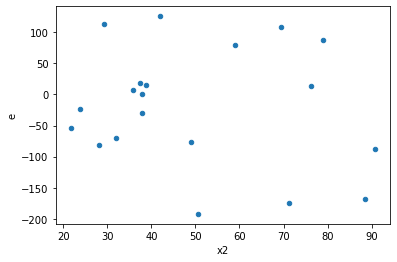

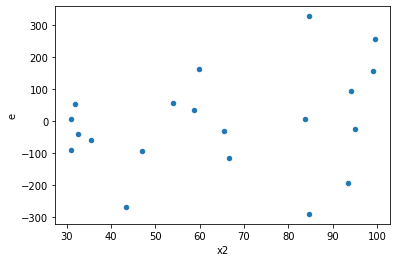

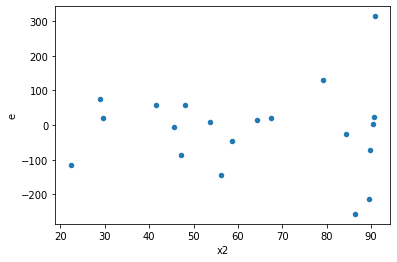

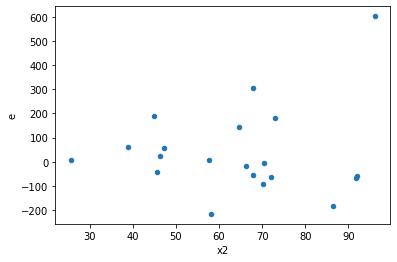

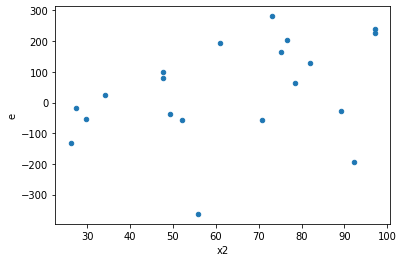

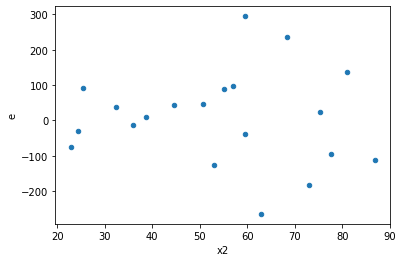

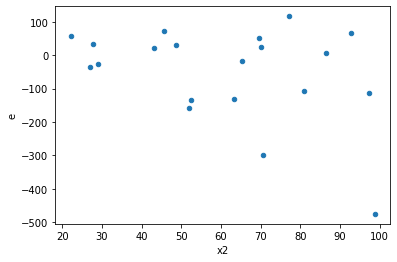

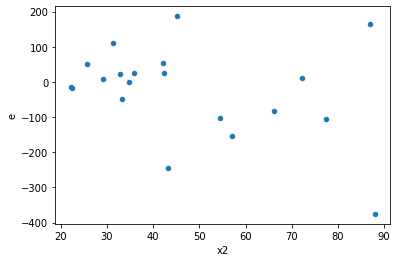

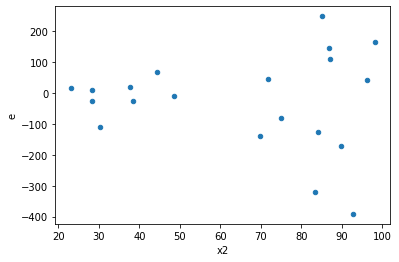

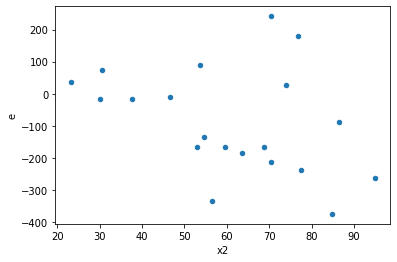

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,9.0,5.0,143422.04798328993,124572.93171721413,15935.783109254437,24914.586343442825,1.563436586243076,0.6479651508164477,0.6760174245917762,0.32398257540822384,Reject005=1 : Homoscedasticity
2.0,7.0,7.0,7372.674108007976,103224.25280688667,1053.2391582868538,14746.321829555238,14.0009243992987,0.0024948810447655845,0.9987525594776172,0.0012474405223827922,Reject005=0 : Heteroscedasticity
4.0,10.0,4.0,41514.66923552401,24142.81641188561,4151.466923552401,6035.704102971403,1.4538726224046763,0.7666685704071874,0.6166657147964063,0.3833342852035937,Reject005=1 : Homoscedasticity
8.0,9.0,5.0,124457.6643666827,205630.90174417064,13828.629374075856,41126.180348834125,2.9739881832347193,0.24272444451003827,0.8786377777449809,0.12136222225501914,Reject005=1 : Homoscedasticity
9.0,7.0,7.0,40164.22844220794,174123.3190587859,5737.74692031542,24874.759865540844,4.335283554851076,0.07182123590038603,0.964089382049807,0.03591061795019301,Reject005=1 : Homoscedasticity
11.0,5.0,9.0,43086.54917325285,292385.6688514522,8617.30983465057,32487.296539050243,3.7700044633903538,0.08108044465832598,0.959459777670837,0.04054022232916299,Reject005=1 : Homoscedasticity
15.0,6.0,8.0,70457.96395175022,113497.83351780743,11742.99399195837,14187.22918972593,1.2081441240148276,0.7819795083512222,0.6090102458243889,0.3909897541756111,Reject005=1 : Homoscedasticity
16.0,7.0,7.0,21011.977499292738,135630.40417235513,3001.711071327534,19375.77202462216,6.454909071595972,0.025034488430058843,0.9874827557849706,0.012517244215029422,Reject005=0 : Heteroscedasticity
17.0,3.0,11.0,7529.025320789286,245405.80053560628,2509.675106929762,22309.618230509663,8.889444760761235,0.005618490329812209,0.9971907548350939,0.0028092451649061045,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,11.0,3.0,263876.51509370684,18213.55914987081,23988.774099427894,6071.18638329027,0.25308447852010335,0.07777333041498453,Reject005=1 : Homoscedasticity
1.0,9.0,5.0,143422.04798328993,124572.93171721413,15935.783109254437,24914.586343442825,1.563436586243076,0.6479651508164477,Reject005=1 : Homoscedasticity
2.0,7.0,7.0,7372.674108007976,103224.25280688667,1053.2391582868538,14746.321829555238,14.0009243992987,0.0024948810447655845,Reject005=0 : Heteroscedasticity
3.0,6.0,8.0,71713.51081408713,35815.4990841841,11952.251802347855,4476.937385523012,0.37456852980988736,0.24804360347450705,Reject005=1 : Homoscedasticity
4.0,10.0,4.0,41514.66923552401,24142.81641188561,4151.466923552401,6035.704102971403,1.4538726224046763,0.7666685704071874,Reject005=1 : Homoscedasticity
5.0,8.0,6.0,224611.3531071332,8188.82901578069,28076.41913839165,1364.8048359634483,0.04861035979111796,0.0003727209956641386,Reject005=0 : Heteroscedasticity
6.0,8.0,6.0,147736.70220993366,73345.5168635186,18467.087776241708,12224.252810586433,0.6619480536781327,0.5745057979641879,Reject005=1 : Homoscedasticity
7.0,6.0,8.0,89359.47491863764,27201.67053334936,14893.245819772941,3400.20881666867,0.2283054250104702,0.08848728100364052,Reject005=1 : Homoscedasticity
8.0,9.0,5.0,124457.6643666827,205630.90174417064,13828.629374075856,41126.180348834125,2.9739881832347193,0.24272444451003827,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      666
Reject005=0 : Heteroscedasticity    334
Name: Result_test, dtype: int64